## Monte-Carlo Integration ##
## In-Class Example ##

Estimate:

$$
I = \int_{-\infty}^{\infty} \frac{1}{1+e^{-x}} \cdot \frac{1}{\sqrt{2\pi(1.43)}} \cdot \exp\!\left\{-\frac{(x-1.5)^2}{2.86}\right\} \, dx
$$

and give a $95\%$ confidence interval for $I$.

<br /> 
<br /> 
First, we observe that 
$$h(x) = \frac{1}{1+e^{-x}}$$ 
is the inverse of the logit function and 
$$
p(x) = \frac{1}{\sqrt{2\pi(1.43)}} \cdot \exp\!\left\{-\frac{(x-1.5)^2}{2.86}\right\}
$$
is the pdf of $N(1.5,1.43)$.

In [2]:
import numpy as np

mu = 1.5                #from N(1.5, 1.43), N(mu, sigma^2)
sigma2 = 1.43           #from N(1.5, 1.43), N(mu, sigma^2)
sigma = np.sqrt(sigma2) #standard deviation
m = 10000               # number of Monte Carlo samples

# logistic function
def h(x):
    return 1 / (1 + np.exp(-x))

# simulating X ~ N(mu, sigma^2)
X = np.random.normal(mu, sigma, size=m) #Draws m i.i.d samples from N(mu, sigma2). x is an array of length m. 

# evaluating g(X) = h(X)
g = h(X)

# Monte-Carlo estimate of I
I_hat = np.mean(g)

# Variance estimate of the mean
v = np.mean((g - np.mean(g))**2) / m

# 95% confidence interval
ci_low = I_hat - 1.96 * np.sqrt(v)
ci_high = I_hat + 1.96 * np.sqrt(v)

print("Monte Carlo estimate of I:", I_hat)
print("Variance estimate:", v)
print("95% CI:", (ci_low, ci_high))


Monte Carlo estimate of I: 0.7662287304720364
Variance estimate: 3.43097236127038e-06
95% CI: (0.7625982451844948, 0.769859215759578)


Monte Carlo estimate of I: 0.765815
95% CI: (0.764675, 0.766954)


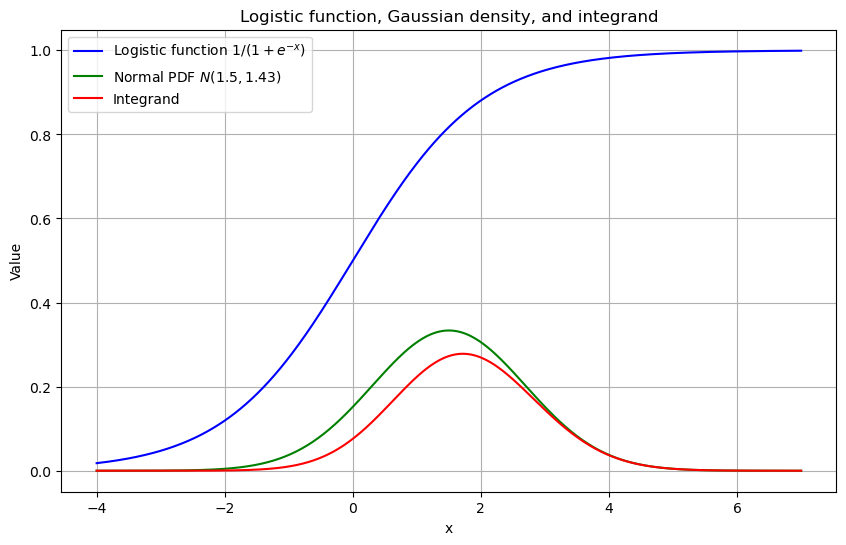

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the normal distribution
mu = 1.5
sigma2 = 1.43
sigma = np.sqrt(sigma2)

# Logistic (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Monte Carlo estimate of I
np.random.seed(42)  # reproducible
n_samples = 100_000
X = np.random.normal(mu, sigma, size=n_samples)
I_hat = np.mean(sigmoid(X))

# Variance estimate and 95% CI
var_est = np.var(sigmoid(X), ddof=1)
se = np.sqrt(var_est / n_samples)
ci_low = I_hat - 1.96 * se
ci_high = I_hat + 1.96 * se

print(f"Monte Carlo estimate of I: {I_hat:.6f}")
print(f"95% CI: ({ci_low:.6f}, {ci_high:.6f})")

# Plot logistic function, Gaussian density, and integrand
x_vals = np.linspace(-4, 7, 500)
logistic_vals = sigmoid(x_vals)
gaussian_vals = norm.pdf(x_vals, mu, sigma)
integrand_vals = logistic_vals * gaussian_vals

plt.figure(figsize=(10,6))
plt.plot(x_vals, logistic_vals, label="Logistic function $1/(1+e^{-x})$", color="blue")
plt.plot(x_vals, gaussian_vals, label=f"Normal PDF $N({mu}, {sigma2})$", color="green")
plt.plot(x_vals, integrand_vals, label="Integrand", color="red")
plt.title("Logistic function, Gaussian density, and integrand")
plt.xlabel("x")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()
